<a href="https://colab.research.google.com/github/wangechi-wq/KNN-Naive-Bayes-Classifier/blob/main/Copy_of_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Determine whether an email is a spam or not using the Naive Bayes Classifier

### b) Defining the Metric for Success

The model will be appraised succesful if it will be able to predict in the right way whether an email is a spam or not a spam. We will set 85% as our minimum accuracy score for the models.

### c) Understanding the context 

Email spam, also known as junk email, refers to unsolicited email messages, usually sent in bulk to a large list of recipients. Spam can be sent by real humans, but more often, it is sent by a botnet, which is a network of computers (bots or spambots) infected with malware and controlled by a single attacking party (bot herder). Apart from email, spam can also be distributed via text messages or social media.

### d) Recording the Experimental Design

The following are the experimental design i used for the successful completion of the project:

1. Importing all the necessary libraries
2. Loading the dataset
3. Reading, cleaning the dataset Performing:
4. Exploratory Data Analysis
5. Creating models using the Naive Bayes Classifier
6. Challenge the solution using SVM
7. Giving a conclusion and recommendation for the project

### e) Data Relevance

The dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Spambase
where by the case study us summarized below:

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

## 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Data from the source i.e. csv
# ---
espam = pd.read_csv("spambase.data")
espam.head(4)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#Loading the names file to get the correct column names
with open('spambase.names') as f:
    contents = f.read()
    print(contents)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [ ]:
#Renaming columns according to the names file provided
espam.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
espam.shape

(4600, 58)

The dataset has 4600 rows and 58 columns

In [ ]:
# Previewing the top of our dataset
#
espam.head(4)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
# 
espam.tail(4)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
espam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

The columns have the right datatypes

In [ ]:
#checking unque values in our target column
espam['class'].unique()

array([1, 0])

1 represents emails that are spam while 0 represents those that are not spam

In [ ]:
#checking information of the dataset
espam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

All columns are in numerical form and the datatypes are correct

In [ ]:
# Identifying the Missing Data
#
espam.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

There are no null values in the dataset

In [ ]:
#checking for duplicate values
espam.duplicated().sum()

391

There are 391 duplicates which should be dropped

## 4. External Data Source Validation

# 5. Tidying the Dataset

In [ ]:
# Dealing with the duplicate Data
#
espam.drop_duplicates(inplace=True)
espam.duplicated().sum()

0

## 6. Exploratory Analysis

## a) Univariate Analysis

In [ ]:
#checking descriptive statistics of the dataset
espam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Text(0.5, 1.0, 'Spam vs not Spam Emails')

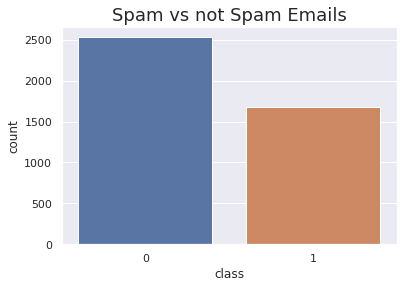

In [ ]:
# Plotting the class column

sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=espam)
ax.set_title('Spam vs not Spam Emails', fontsize=18)

From the output, emails that are not spam have a high count compared to the spam emails

## b) Bivariate Analysis

In [ ]:
espam.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0

## 7. Implementing the Solution

## a) Gaussian:

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Splitting the dataset.

X = espam.drop('class', axis = 1)
y = espam['class']

In [ ]:
# Normalizing the features 
       
from sklearn.preprocessing import Normalizer

normal = Normalizer().fit(X)

In [ ]:
# Training the model.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , f1_score            
from sklearn.metrics import classification_report
clf = GaussianNB()
clf = GaussianNB().fit(X_train, y_train)

# Predicting
y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.95      0.72      0.82       490
           1       0.71      0.95      0.81       352

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.85      0.82      0.82       842

[[353 137]
 [ 17 335]]
The accuracy : 0.8171021377672208


The accuracy is 81.71% which is quite good

## b)Bernoulli: 

In [ ]:
# Training the model using BernoulliNB.
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

clff = BernoulliNB()
clff = BernoulliNB().fit(X_train, y_train)


In [ ]:
# Doing the prediction
y_pred = clff.predict(X_test)

# Evaluating the accuracy of the model

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       738
           1       0.89      0.82      0.85       525

    accuracy                           0.88      1263
   macro avg       0.88      0.87      0.88      1263
weighted avg       0.88      0.88      0.88      1263

[[685  53]
 [ 96 429]]
The accuracy : 0.8820269200316706


The accuracy for the model is 88.20% which is higher than the Gausian variation

## c) Multinomial: 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Training the model.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 55)


In [ ]:
cl = MultinomialNB()
cl = MultinomialNB().fit(X_train, y_train)

# Making predictions
y_pred = cl.predict(X_test)

# Evaluating the accuracy of the model
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       995
           1       0.77      0.74      0.76       689

    accuracy                           0.80      1684
   macro avg       0.80      0.79      0.80      1684
weighted avg       0.80      0.80      0.80      1684

[[842 153]
 [178 511]]
The accuracy : 0.8034441805225653


The accuracy for this model is 80.34 which performed poorest among Guassian and Bernoulli

I would recommend Bernoulli since it performed best with an accuracy score is  88.20%.

## 8. Challenging the solution

We will challenge our solution usingg SVM to determine which one will perform better than Naive Bayes Classifier





In [ ]:
# Reviewing the Solution 
#
# Selecting the independent variables and the target variable
#
X = espam.drop(columns = 'class')
y = espam['class']

# Instantiating and creating a list of models for iteration
#
from sklearn.svm import SVC,LinearSVC
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
  # Standardising the data
  from sklearn.preprocessing import StandardScaler 
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.7517814726840855 and the f1 score is: 0.5828343313373253
The accuracy score of Linear     is: 0.9275534441805225 and the f1 score is: 0.9106881405563689
The accuracy score of Rbf        is: 0.9323040380047506 and the f1 score is: 0.9155555555555555


Linear model performed best in SVM with an accuracy score of 92.76%

# Recommendations

Bernoulli model was able to meet our set mininum accuracy score of 85%, since it had a 88.20% score. However for this project, I recommend tthe use of SVM Linear model compared to Naive Bayes classifier since it has a high accuracy score of 92.76%